<a href="https://colab.research.google.com/github/Biel-PS/AdvancedFluidMechanics/blob/BielPS/2-Rheology/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2. Rheological behaviour of cosmetic creams

It is a sample of rheological behaviour of some cosmetic creams, taken from [here](https://www.rheologylab.com/articles/emulsion-stability/)

![image.png](https://github.com/Biel-PS/AdvancedFluidMechanics/blob/main/2-Rheology/CSVP-of-Lotions-and-Creams-names-removed.webp?raw=1)

What conclusions would you get from that about the behaviour of day creams in front of body creams?

Let's consider the case of the body lotion C. Fit the Power Law model, get coefficients and plot it. You will see that it is not good. You will see that it does not agree with very low (_zero-shear rate viscosity_) or high (_infinity-shear rate viscosity_) shear stress. There are some other models that deals with this behaviour. The molt usual is the [Carreau model](https://en.wikipedia.org/wiki/Carreau_fluid). Apply this law to obtain a more accurate model of this fluid and discuss it.


In [87]:
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
import statsmodels.api as sm
sp.init_printing()
from IPython.display import display, Math
Deltap,L,r,n,R, sig, eta,gamma,K= sp.symbols('{\Delta}p L r n R sigma eta gamma K',positive=True)
uz = sp.Function('u_z')

eq1 = sp.Eq(eta,sig/gamma)
eq2 = sp.Eq(sig,K*gamma**n)

Eq1= sp.solve([eq1],[gamma])
Eq = eq2.subs(gamma,Eq1[gamma])

Eq= sp.solve([Eq],[sig])

expression = sp.Eq(sig,Eq[0][0])

display(expression)

# Eq = sp.Eq(sp.log(sig),sp.log(eta*(1/(2*eta)*(Deltap/L)*r)**(1/(n-1))))
# display(Eq)


exprLog = sp.Eq(sp.log(expression.lhs),sp.log(expression.rhs))
exprLog = exprLog.expand(force=True)
display(exprLog)

A,B = sp.symbols('A B',positive=True)

Aeq = n/(n-1)
Beq = -sp.log(K)/(n-1)

logExpr = sp.Eq(sp.log(sig), A*(sp.log(eta)) + B)

display(logExpr)

      -1      n  
     ─────  ─────
     n - 1  n - 1
σ = K     ⋅η     

         n⋅log(η)   log(K)
log(σ) = ──────── - ──────
          n - 1     n - 1 

log(σ) = A⋅log(η) + B

In [88]:
DataFrame = pd.read_csv("Default Dataset (1).csv",header=None,names=['x','y'], delimiter=";", decimal=",")


model = smf.ols('np.log(y) ~ np.log(x)', DataFrame)  # 1. Define model of regression
result = model.fit()                   # 2. Adjust model of the data
result.summary()


display(result.params)

,0
Intercept,11.751671
np.log(x),-2.617894


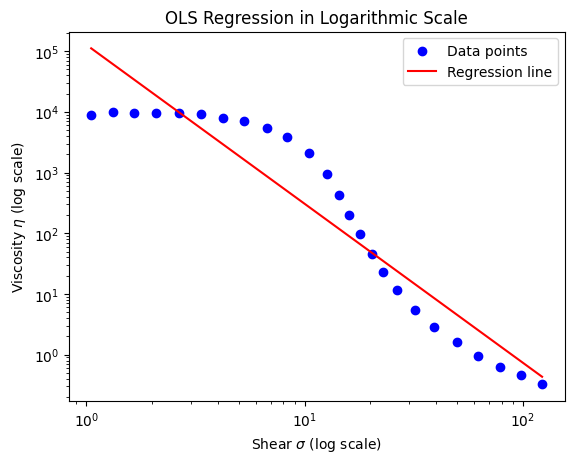

In [100]:
intercept = result.params['Intercept']
slope = result.params['np.log(x)']

# Create a range of x values (log-transformed) for plotting the regression line in logarithmic space
x_vals = DataFrame['x']  # Use the original x values for plotting the regression line in the original scale

# Compute the y-values for the regression line in logarithmic space
y_vals_log = intercept + slope * np.log(x_vals)  # Regression line equation in log scale

# Convert the y-values back to the original scale using np.exp() for the plot
y_vals = np.exp(y_vals_log)

# Plot the data points (log-transformed)
plt.scatter(DataFrame['x'], DataFrame['y'], color='blue', label='Data points')

# Plot the regression line (on the original scale)
plt.plot(x_vals, y_vals, color='red', label='Regression line')

# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Adding labels and title
plt.xlabel('Shear $\sigma$ (log scale)')
plt.ylabel('Viscosity $\eta$ (log scale)')
plt.title('OLS Regression in Logarithmic Scale')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [90]:
Aeq = n/(n-1)
Beq = -sp.log(K)/(n-1)

nVal = sp.solve(sp.Eq(Aeq , slope),n)
Beq = Beq.subs(n,nVal[0])
KVal = sp.solve(sp.Eq(Beq , intercept),K)

Aeq = Aeq.subs({n:nVal[0], K: KVal[0]})
Beq = Beq.subs({n:nVal[0], K: KVal[0]})

LinearModel = logExpr.subs({A:Aeq, B: Beq})
display(nVal)
display(KVal)

display(LinearModel)


[0.723596111532329]

[25.7441510619581]

log(σ) = 11.7516706298573 - 2.61789410975295⋅log(η)

Now we define the Carreau model

In [128]:
eta, etaInf, eta0, lam,gamma, n= sp.symbols('eta \eta_{inf} eta_0 lambda gamma n',positive=True)

eq1 = sp.Eq(eta, etaInf + (eta0-etaInf)*(1+(lam*gamma)**2)**((n-1)/2))
eq2 = sp.Eq(sig,K*gamma**n)
# eta0 is the viscosity at zero shear rate (sig = 0) and etainf is the viscosity at sig = inf
Eq1= sp.solve([eq1],[gamma])

Eq = eq2.subs(gamma,Eq1[1][0])
display(Eq)

exprLog = sp.Eq(sp.log(Eq.lhs),sp.log(Eq.rhs))
exprLog = exprLog.expand(force=True)
exprLog = sp.simplify(exprLog)

display(exprLog)


                                           n
      ⎛       ____________________________⎞ 
      ⎜      ╱                    2       ⎟ 
      ⎜     ╱                   ─────     ⎟ 
      ⎜    ╱                    n - 1     ⎟ 
      ⎜   ╱    ⎛\eta_{inf} - η ⎞          ⎟ 
      ⎜  ╱     ⎜───────────────⎟      - 1 ⎟ 
      ⎜╲╱      ⎝\eta_{inf} - η₀⎠          ⎟ 
σ = K⋅⎜───────────────────────────────────⎟ 
      ⎝                 λ                 ⎠ 

              ⎛                   2      ⎞             
              ⎜                 ─────    ⎟             
              ⎜                 n - 1    ⎟             
              ⎜⎛\eta_{inf} - η ⎞         ⎟             
         n⋅log⎜⎜───────────────⎟      - 1⎟             
              ⎝⎝\eta_{inf} - η₀⎠         ⎠      ⎛   -n⎞
log(σ) = ───────────────────────────────── + log⎝K⋅λ  ⎠
                         2                             

NameError: name 'LinearRegression' is not defined